<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Time_Series_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Correlation and Autocorrelation

In [3]:

multiTimeline = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/multiTimeline.csv'
multiTimeline_df = pd.read_csv(multiTimeline, skiprows=1)
multiTimeline_df.columns = ['month', 'diet', 'gym', 'finance']
multiTimeline_df.head()


,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


### Set index to_datetime

In [4]:
diet = multiTimeline_df[['month','diet']]
diet.set_index('month', inplace=True)

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)
diet.head()

# https://www.datacamp.com/tutorial/time-series-analysis-tutorial

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,67
2004-04-01,70
2004-05-01,72


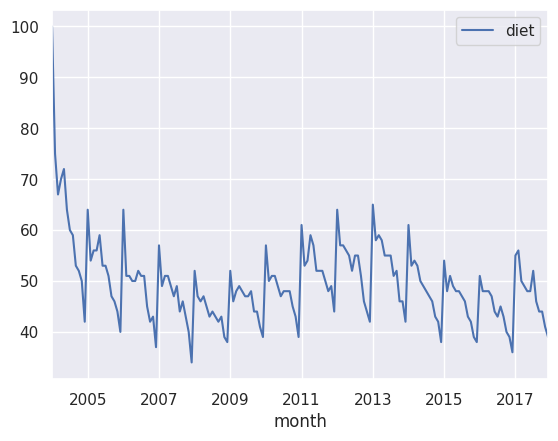

In [5]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

### Slice the dataset by year

In [21]:
yearly_diet = diet.asfreq('AS')
print(yearly_diet)
print(f"\n yearly_diet.loc['2012']  {yearly_diet.loc['2012']}")
print(f"\n yearly_diet.loc['2012':].head()  {yearly_diet.loc['2012':].head()}")


            diet
month           
2004-01-01   100
2005-01-01    64
2006-01-01    64
2007-01-01    57
2008-01-01    52
2009-01-01    52
2010-01-01    57
2011-01-01    61
2012-01-01    64
2013-01-01    65
2014-01-01    61
2015-01-01    54
2016-01-01    51
2017-01-01    55

 yearly_diet.loc['2012']              diet
month           
2012-01-01    64

 yearly_diet.loc['2012':].head()              diet
month           
2012-01-01    64
2013-01-01    65
2014-01-01    61
2015-01-01    54
2016-01-01    51


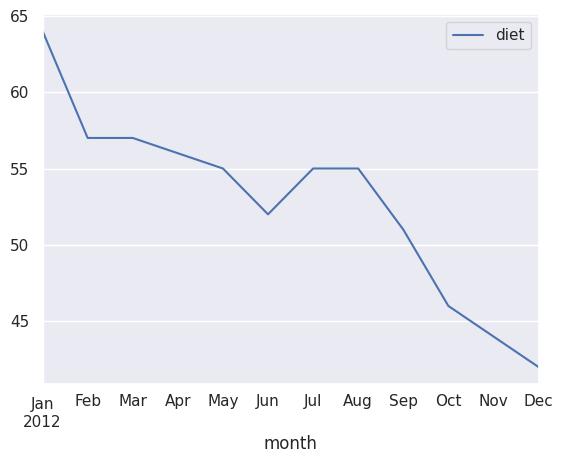

In [6]:
# Slice the dataset to keep only 2012
diet2012 = diet.loc['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

### Merging Time Series With Different Dates


In [23]:
stocks_data = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/stocks.csv'
stocks = pd.read_csv(stocks_data, parse_dates=['DATE'], index_col='DATE')
stocks.head()

,SP500
DATE,
2013-11-04,1767.93
2013-11-05,1762.97
2013-11-06,1770.49
2013-11-07,1747.15
2013-11-08,1770.61


In [24]:
bonds_data = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/bonds.csv'
bonds = pd.read_csv(bonds_data, parse_dates=['DATE'], index_col='DATE')
bonds.head()

,IRLTLT01USM156N
DATE,
2013-09-01,2.81
2013-10-01,2.62
2013-11-01,2.72
2013-12-01,2.90
2014-01-01,2.86


In [25]:
#Convert the stock index and bond index into sets = distinct index
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')
print(stocks_and_bonds.head())

{Timestamp('2017-11-10 00:00:00'), Timestamp('2014-11-19 00:00:00'), Timestamp('2023-05-12 00:00:00'), Timestamp('2019-02-27 00:00:00'), Timestamp('2015-07-31 00:00:00'), Timestamp('2017-05-23 00:00:00'), Timestamp('2023-04-26 00:00:00'), Timestamp('2015-03-26 00:00:00'), Timestamp('2014-02-25 00:00:00'), Timestamp('2022-11-14 00:00:00'), Timestamp('2015-10-22 00:00:00'), Timestamp('2018-01-23 00:00:00'), Timestamp('2016-09-23 00:00:00'), Timestamp('2019-04-05 00:00:00'), Timestamp('2014-09-19 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2023-02-10 00:00:00'), Timestamp('2021-03-08 00:00:00'), Timestamp('2015-04-09 00:00:00'), Timestamp('2018-11-09 00:00:00'), Timestamp('2022-11-09 00:00:00'), Timestamp('2018-05-24 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2015-08-13 00:00:00'), Timestamp('2018-10-22 00:00:00'), Timestamp('2021-09-28 00:00:00'), Timestamp('2018-04-17 00:00:00'), Timestamp('2019-05-10 00:00:00'), Timestamp('20

### Correlation of Two Time Series

               SP500  IRLTLT01USM156N
DATE                                 
2014-01-01       NaN              NaN
2014-04-01       NaN        -0.052448
2014-05-01 -0.000976        -0.055351
2014-07-01  0.047588        -0.007812
2014-08-01 -0.024411        -0.047244
...              ...              ...
2023-03-01 -0.040741        -0.024000
2023-05-01  0.054786        -0.024590
2023-06-01  0.012752         0.050420
2023-08-01  0.084271         0.112000
2023-09-01 -0.013320         0.050360

[84 rows x 2 columns]
Correlation of stocks and interest rates:  0.3329837712161173


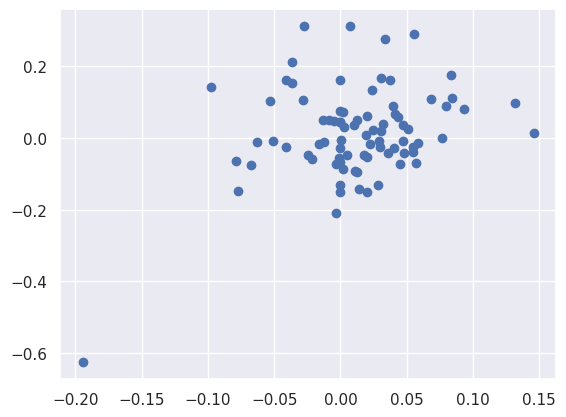

In [69]:
# Compute percent change using pct_change()

stocks_and_bonds['SP500'] = pd.to_numeric(stocks_and_bonds['SP500'], errors='coerce').dropna()
stocks_and_bonds['IRLTLT01USM156N'] = pd.to_numeric(stocks_and_bonds['IRLTLT01USM156N'], errors='coerce').dropna()

returns = stocks_and_bonds.pct_change()
print(returns)

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['IRLTLT01USM156N'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
# plt.scatter(stocks_and_bonds['SP500'], stocks_and_bonds['IRLTLT01USM156N'])
plt.scatter(returns['SP500'], returns['IRLTLT01USM156N'])
plt.show()

### spurious correlation
 Two trending series may show a strong correlation even if they are completely unrelated.

In [42]:
DJI_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/DJI.csv'
DJI = pd.read_csv(DJI_csv, parse_dates=['Date'], index_col='Date')
DJI.rename(columns={"Value": "DJI"}, inplace=True)
print(DJI.head())

UFO_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/UFO.csv'
UFO = pd.read_csv(UFO_csv, parse_dates=['Date'], index_col='Date')
UFO.rename(columns={"Value": "UFO"}, inplace=True)
print(UFO.head())


               DJI
Date              
1941-01-01  110.96
1942-01-01  119.40
1943-01-01  135.89
1944-01-01  152.32
1945-01-01  192.91
            UFO
Date           
1941-01-01    1
1942-01-01    2
1943-01-01    9
1944-01-01    9
1945-01-01    9


               DJI  UFO
Date                   
1941-01-01  110.96    1
1942-01-01  119.40    2
1943-01-01  135.89    9
1944-01-01  152.32    9
1945-01-01  192.91    9
Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


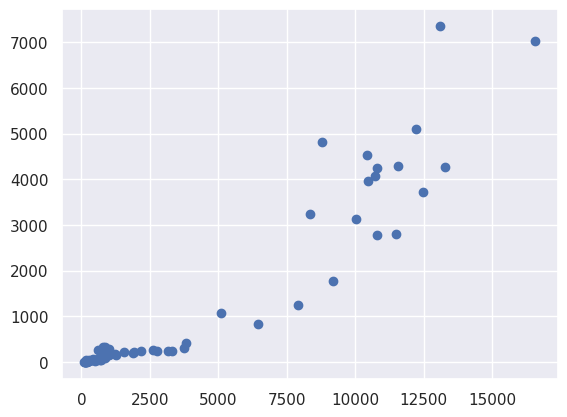

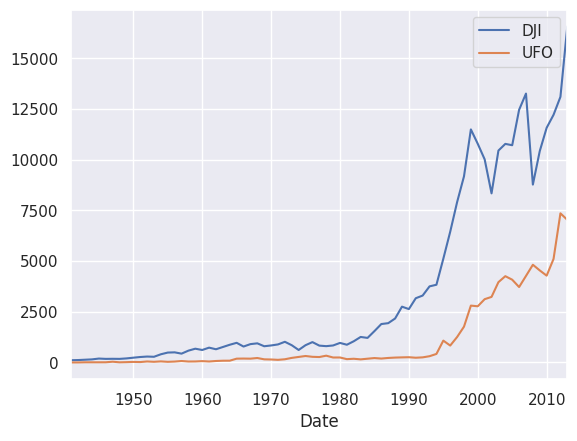

In [49]:
levels = pd.concat([DJI,UFO], axis=1)
print(levels.head())

# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

plt.scatter(levels['DJI'], levels['UFO'])
levels.plot()
plt.show()

### Simple Linear Regression

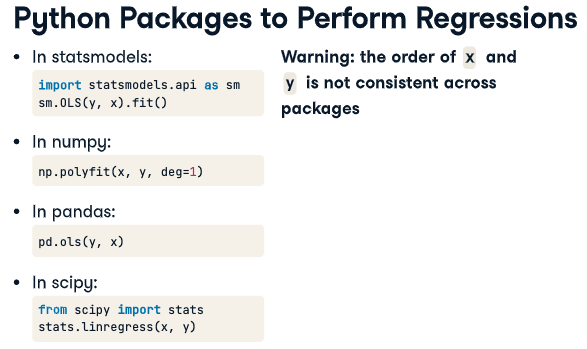

In [95]:
# Import the statsmodels module
import statsmodels.api as sm

returns = returns.dropna()
returns.reset_index(drop=True, inplace=True)

# Compute correlation of x and y
# returns = returns.rename(columns={'SP500':'x'})
x = returns['SP500'].squeeze()
y = returns['IRLTLT01USM156N'].squeeze()


correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame

dfx = pd.DataFrame(x)
print(dfx)
# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)


# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 0.33
       SP500
0  -0.000976
1   0.047588
2  -0.024411
3   0.000000
4   0.010913
..       ...
77 -0.040741
78  0.054786
79  0.012752
80  0.084271
81 -0.013320

[82 rows x 1 columns]
                            OLS Regression Results                            
Dep. Variable:        IRLTLT01USM156N   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     9.976
Date:                Thu, 09 Nov 2023   Prob (F-statistic):            0.00224
Time:                        01:36:56   Log-Likelihood:                 57.133
No. Observations:                  82   AIC:                            -110.3
Df Residuals:                      80   BIC:                            -105.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                 

## Autocorrelation


*   Correlation of a time series with a lagged copy of itself
*   Also called serial correlation
*   Lag-one autocorrelation

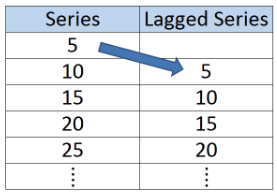



In [99]:
MSFT_data = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/MSFT.csv'
MSFT = pd.read_csv(MSFT_data, parse_dates=['Date'], index_col=['Date'])
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [102]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()
print(MSFT.head())

# Compute the percentage change of prices
returns = MSFT.pct_change()
print(returns.head())

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

            Adj Close
Date                 
2012-08-12  26.517351
2012-08-19  27.114212
2012-08-26  26.815865
2012-09-02  27.044012
2012-09-09  27.158091
            Adj Close
Date                 
2012-08-12        NaN
2012-08-19   0.022508
2012-08-26  -0.011003
2012-09-02   0.008508
2012-09-09   0.004218
The autocorrelation of weekly returns is -0.16


In [103]:
# Compute the daily change in interest rates
daily_diff = MSFT.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = MSFT['Adj Close'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = MSFT.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 1.00
The autocorrelation of annual interest rate changes is 0.05


# Autocorrelation Function (ACF)

The autocorrelation as a function of the lag